In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import PC, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [2]:
df_3_false = pd.read_csv('../data/samples/sample_hdumb_3_false.csv')
df_3_false['timestamp'] = df_3_false['timestamp'].astype(float)
df_3_false['time'] = df_3_false['timestamp'] - df_3_false['timestamp'].iloc[0]

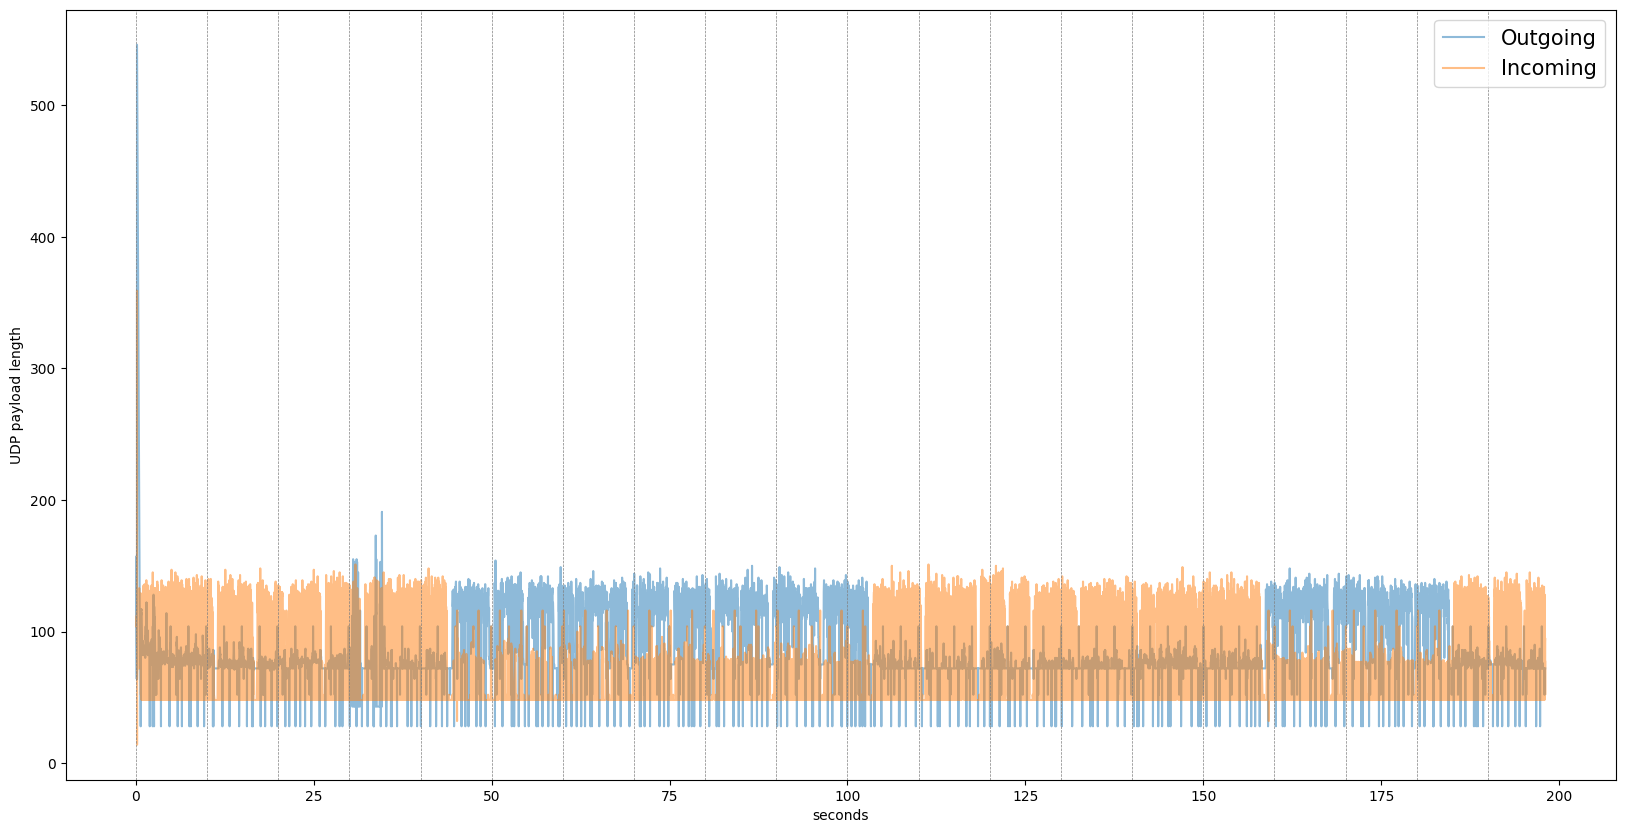

In [4]:
# Plot outgoing and incoming traffic for 10.0.1.1
df_3_false_out = df_3_false[df_3_false['src_ip'] == '10.0.1.1']
df_3_false_out = df_3_false_out.sort_values(by='timestamp')
df_3_false_in = df_3_false[df_3_false['dst_ip'] == '10.0.1.1']
df_3_false_in = df_3_false_in.sort_values(by='timestamp')
plt.figure(figsize=(20, 10))
plt.plot(df_3_false_out['time'], df_3_false_out['udp_payload_length'], alpha=0.5, label='Outgoing')
plt.plot(df_3_false_in['time'], df_3_false_in['udp_payload_length'], alpha=0.5, label='Incoming')

# Add vertical lines every 10 seconds
start_time = min(df_3_false_out['time'].min(), df_3_false_in['time'].min())
end_time = max(df_3_false_out['time'].max(), df_3_false_in['time'].max())
for t in range(int(start_time), int(end_time) + 1, 10):
    plt.axvline(x=t, color='gray', linestyle='--', linewidth=0.5)

plt.legend(fontsize='15')
plt.xlabel('seconds')
plt.ylabel('UDP payload length')
plt.show()

In [85]:
with open('../data/samples/sample_hdumb_3_false_bins.pkl', 'rb') as file:
    data = pickle.load(file)

In [86]:
rows = []
for ip, stats in data.items():
    for index, values in stats.items():
        values['IP'] = ip
        values['bin_index'] = index
        rows.append(values)

# Create the DataFrame
df = pd.DataFrame(rows)

column_order = ['IP', 'bin_index'] + [col for col in df.columns if col not in ['IP', 'bin_index']]
df = df[column_order]

df

,IP,bin_index,total_bytes_incoming,total_bytes_outgoing,incoming_packets,outgoing_packets,sum_inter_arrival_incoming,count_inter_arrival_incoming,sum_inter_arrival_outgoing,count_inter_arrival_outgoing,average_incoming_bytes,std_incoming_bytes,median_incoming_bytes,packet_frequency_incoming,average_inter_arrival_incoming,average_outgoing_bytes,std_outgoing_bytes,median_outgoing_bytes,packet_frequency_outgoing,average_inter_arrival_outgoing
0,10.0.1.1,0,105336,42151,1084,511,9.966632,1083,9.960501,510,97.173432,28.388275,96.0,108.4,0.009203,82.487280,24.856437,79.0,51.1,0.019530
1,10.0.1.1,1,86779,39866,943,532,9.998707,943,10.012674,532,92.024390,26.879112,79.0,94.3,0.010603,74.936090,8.767538,75.0,53.2,0.018821
2,10.0.1.1,2,79904,39474,834,529,9.999061,834,9.985281,529,95.808153,28.227835,99.0,83.4,0.011989,74.620038,8.419250,76.0,52.9,0.018876
3,10.0.1.1,3,70648,38976,704,535,10.003702,704,10.011403,535,100.352273,29.309275,113.0,70.4,0.014210,72.852336,21.458231,72.0,53.5,0.018713
4,10.0.1.1,4,40509,51054,457,531,9.991360,457,10.001567,531,88.641138,30.115973,82.0,45.7,0.021863,96.146893,26.736822,86.0,53.1,0.018835
5,10.0.1.1,5,22666,58063,325,533,10.007949,325,9.991512,533,69.741538,16.718649,77.0,32.5,0.030794,108.936210,25.429980,119.0,53.3,0.018746
6,10.0.1.1,6,29625,58348,413,530,10.000702,413,9.996488,530,71.731235,15.554256,77.0,41.3,0.024215,110.090566,24.037292,119.0,53.0,0.018861
7,10.0.1.1,7,56455,60134,768,533,9.960642,768,10.001882,533,73.509115,11.413865,77.0,76.8,0.012970,112.821764,22.746315,120.0,53.3,0.018765
8,10.0.1.1,8,37122,58329,519,529,10.031033,519,9.997895,529,71.526012,13.237903,77.0,51.9,0.019328,110.262760,24.168383,120.0,52.9,0.018900
9,10.0.1.1,9,42909,60417,587,534,9.994147,587,9.997244,534,73.098807,13.078019,77.0,58.7,0.017026,113.140449,22.623290,120.0,53.4,0.018721


In [87]:
with open('../data/samples/sample_hdumb_3_false_bins2.pkl', 'rb') as file:
    data2 = pickle.load(file)

In [88]:
rows = []
for ip, stats in data.items():
    for index, values in stats.items():
        values['IP'] = ip
        values['bin_index'] = index
        rows.append(values)

# Create the DataFrame
df2 = pd.DataFrame(rows)

column_order = ['IP', 'bin_index'] + [col for col in df2.columns if col not in ['IP', 'bin_index']]
df2 = df2[column_order]

df = pd.concat([df, df2], ignore_index=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IP                              120 non-null    object 
 1   bin_index                       120 non-null    int64  
 2   total_bytes_incoming            120 non-null    int64  
 3   total_bytes_outgoing            120 non-null    int64  
 4   incoming_packets                120 non-null    int64  
 5   outgoing_packets                120 non-null    int64  
 6   sum_inter_arrival_incoming      120 non-null    float64
 7   count_inter_arrival_incoming    120 non-null    int64  
 8   sum_inter_arrival_outgoing      120 non-null    float64
 9   count_inter_arrival_outgoing    120 non-null    int64  
 10  average_incoming_bytes          120 non-null    float64
 11  std_incoming_bytes              120 non-null    float64
 12  median_incoming_bytes           120 

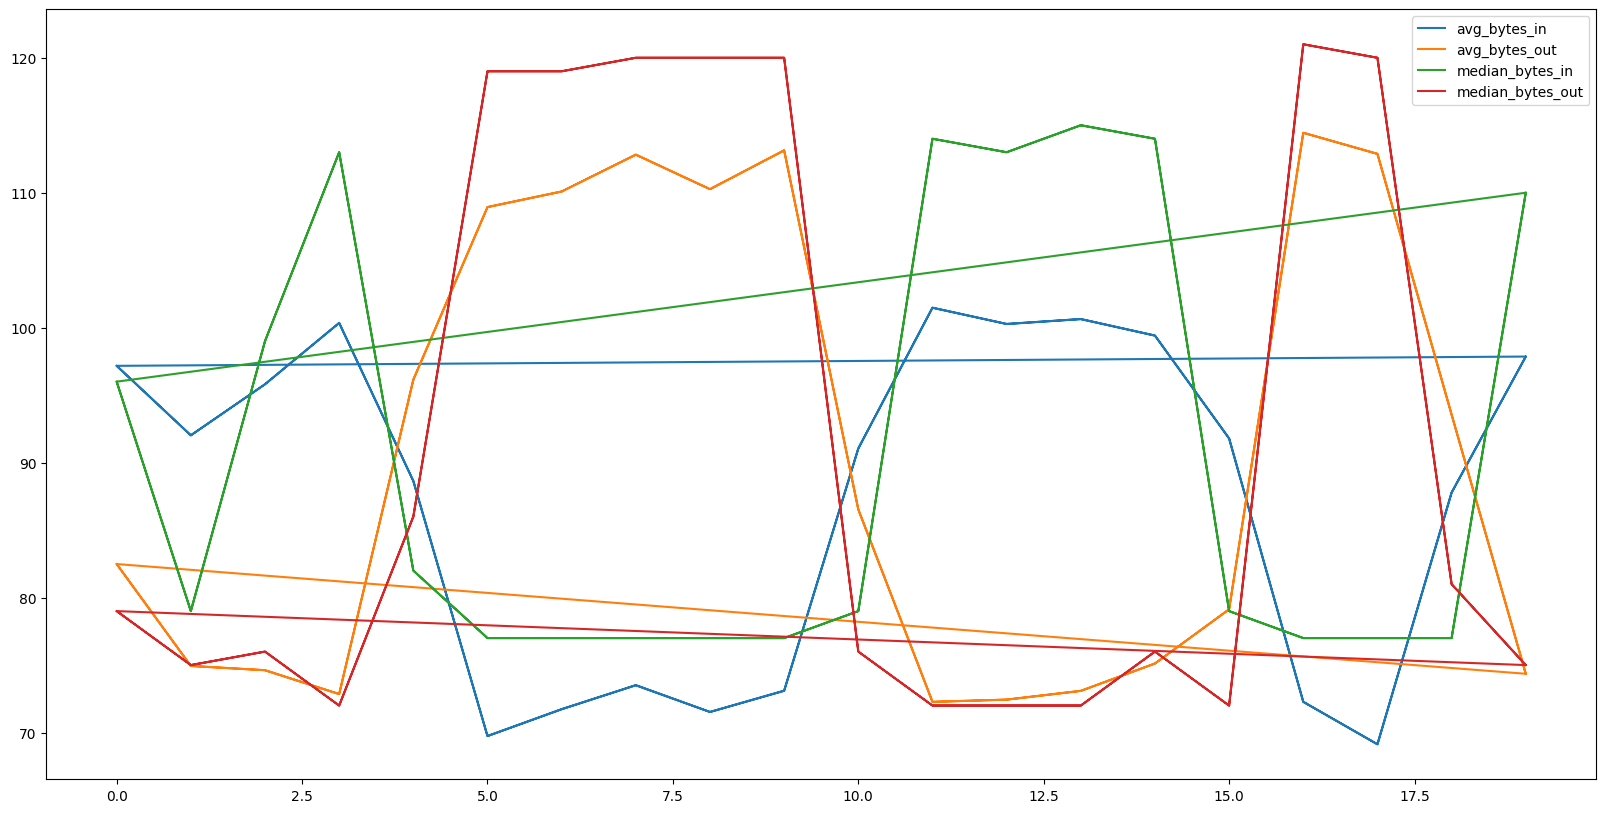

In [81]:
plot_df = df[df['IP'] == '10.0.1.1']

plt.figure(figsize=(20, 10))
# plt.plot(plot_df['total_bytes_incoming'], label='total_bytes_in')
# plt.plot(plot_df['total_bytes_outgoing'], label='total_bytes_out')
plt.plot(plot_df['average_incoming_bytes'], label='avg_bytes_in')
plt.plot(plot_df['average_outgoing_bytes'], label='avg_bytes_out')
plt.plot(plot_df['median_incoming_bytes'], label='median_bytes_in')
plt.plot(plot_df['median_outgoing_bytes'], label='median_bytes_out')
plt.legend()
plt.show()

In [132]:
df_bayes = df[df['IP'] == '10.0.1.1']
df_bayes = df_bayes[['total_bytes_outgoing', 'total_bytes_incoming', 'median_outgoing_bytes']]

client2 = df[df['IP'] == '10.0.2.1']
# df_bayes['client2_median_outgoing_bytes'] = client2['median_outgoing_bytes'].values
client3 = df[df['IP'] == '10.0.3.1']
df_bayes['client23_median_outgoing_bytes'] = client3['median_outgoing_bytes'].values + client2['median_outgoing_bytes'].values

df_bayes = df_bayes.drop(0)
df_bayes = df_bayes.drop(60)

df_bayes['total_bytes_outgoing'] = pd.cut(df_bayes['total_bytes_outgoing'], 2)
df_bayes['total_bytes_incoming'] = pd.cut(df_bayes['total_bytes_incoming'], 2)
df_bayes['median_outgoing_bytes'] = pd.cut(df_bayes['median_outgoing_bytes'], 2)
df_bayes['client23_median_outgoing_bytes'] = pd.cut(df_bayes['client23_median_outgoing_bytes'], 2)
# df_bayes['client3_median_outgoing_bytes'] = pd.cut(df_bayes['client3_median_outgoing_bytes'], 2)
df_bayes

,total_bytes_outgoing,total_bytes_incoming,median_outgoing_bytes,client23_median_outgoing_bytes
1,"(32093.239, 46502.5]","(54722.5, 86779.0]","(71.951, 96.5]","(169.5, 195.0]"
2,"(32093.239, 46502.5]","(54722.5, 86779.0]","(71.951, 96.5]","(169.5, 195.0]"
3,"(32093.239, 46502.5]","(54722.5, 86779.0]","(71.951, 96.5]","(169.5, 195.0]"
4,"(46502.5, 60883.0]","(22601.887, 54722.5]","(71.951, 96.5]","(143.949, 169.5]"
5,"(46502.5, 60883.0]","(22601.887, 54722.5]","(96.5, 121.0]","(143.949, 169.5]"
6,"(46502.5, 60883.0]","(22601.887, 54722.5]","(96.5, 121.0]","(143.949, 169.5]"
7,"(46502.5, 60883.0]","(54722.5, 86779.0]","(96.5, 121.0]","(143.949, 169.5]"
8,"(46502.5, 60883.0]","(22601.887, 54722.5]","(96.5, 121.0]","(143.949, 169.5]"
9,"(46502.5, 60883.0]","(22601.887, 54722.5]","(96.5, 121.0]","(143.949, 169.5]"
10,"(32093.239, 46502.5]","(54722.5, 86779.0]","(71.951, 96.5]","(169.5, 195.0]"


In [133]:
df_bayes.iloc[3, 0]

Interval(46502.5, 60883.0, closed='right')

In [134]:
est = PC(df_bayes)

skel, seperating_sets = est.build_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:", pdag.edges())

model = pdag.to_dag(pdag)
print("DAG edges:", model.edges())

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/Users/kohtaasakura/Library/Caches/pypoetry/virtualenvs/dsci599project-z6CffgD4-py3.10/lib/python3.10/site-packages/pgmpy/estimators/CITests.py:539: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/Users/ko

Undirected edges:  [('total_bytes_outgoing', 'client23_median_outgoing_bytes')]
PDAG edges: [('client23_median_outgoing_bytes', 'total_bytes_outgoing'), ('total_bytes_outgoing', 'client23_median_outgoing_bytes')]
DAG edges: [('total_bytes_outgoing', 'client23_median_outgoing_bytes')]


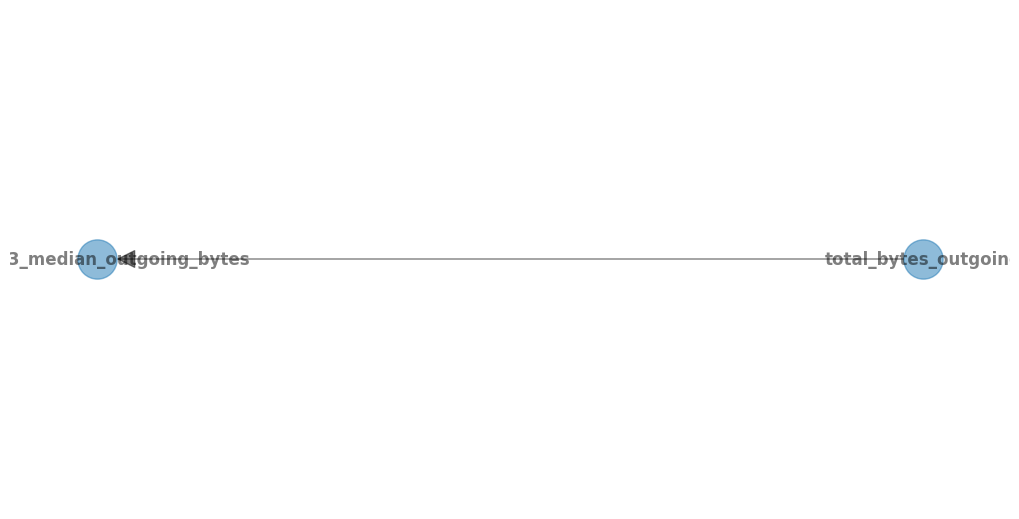

In [135]:
DAG_model = BayesianNetwork(model.edges())
plt.figure(figsize=(10, 5))
nx.draw_circular(DAG_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.5, font_weight='bold')
plt.show()

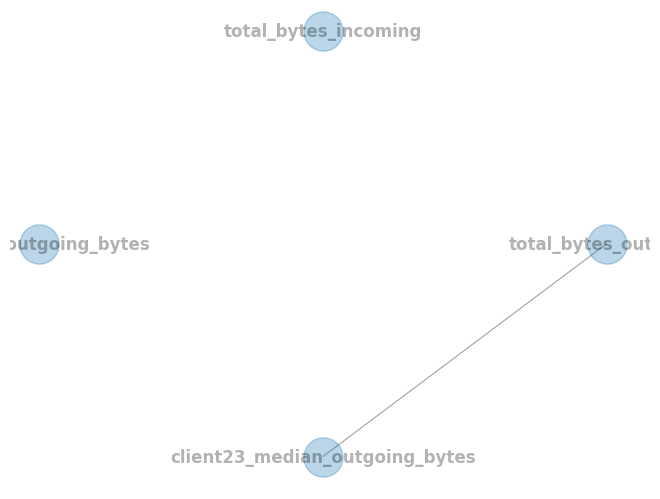

In [136]:
G = nx.Graph()
G.add_nodes_from(df_bayes.columns)
G.add_edges_from(skel.edges())
nx.draw_circular(G, with_labels=True, node_size=800, alpha=0.3, font_weight='bold')
plt.show()

CPD of total_bytes_outgoing:
+--------------------------------------------+----------+
| total_bytes_outgoing((32093.239, 46502.5]) | 0.526316 |
+--------------------------------------------+----------+
| total_bytes_outgoing((46502.5, 60883.0])   | 0.473684 |
+--------------------------------------------+----------+
CPD of median_outgoing_bytes:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
CPD of total_bytes_incoming:
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
CPD of client23_median_outgoing_bytes:
+--------------------------------------------------+----------+
| client23_median_outgoing_bytes((143.949, 169.5]) | 0.526316 |
+--------------------------------------------------+----------+
| client23_median_outgoing_bytes((169.5, 195.0])   | 0.473684 |
+--------------------------------------------------+----------+


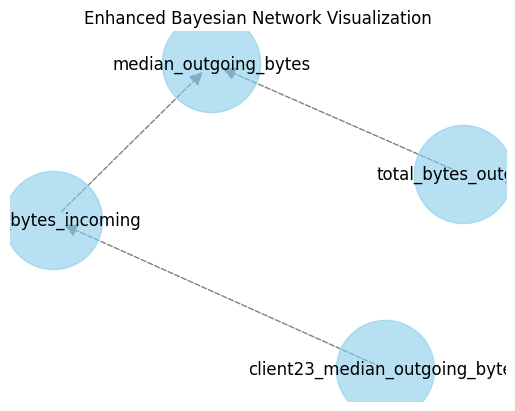

In [137]:
model = BayesianNetwork([
    ('total_bytes_outgoing', 'median_outgoing_bytes'),
    ('total_bytes_incoming', 'median_outgoing_bytes'),
    ('client23_median_outgoing_bytes', 'total_bytes_incoming')
])

# Learning CPDs using Maximum Likelihood Estimators
model.fit(df_bayes, estimator=MaximumLikelihoodEstimator)

# Checking the learned CPDs
for cpd in model.get_cpds():
    print("CPD of {0}:".format(cpd.variable))
    print(cpd)

# Create a networkx directed graph from the model
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

# Specify the layout for node positions
pos = nx.spring_layout(nx_graph, k=0.5, iterations=20)  # 'k' controls the distance between the nodes and 'iterations' for the number of iterations in force-directed algorithm

# Drawing the nodes with options for size, color, and transparency (alpha)
nx.draw_networkx_nodes(nx_graph, pos, node_color='skyblue', alpha=0.6, node_size=5000)

# Drawing the edges with options for style and width
nx.draw_networkx_edges(nx_graph, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', style='dashed')

# Drawing the labels for each node
nx.draw_networkx_labels(nx_graph, pos, font_size=12, font_family='sans-serif')

# Set options for graph appearance
plt.title('Enhanced Bayesian Network Visualization')
plt.box(False)
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

In [138]:
infer = VariableElimination(model)
interval_key = pd.Interval(left=46502.5, right=60883.0, closed='right')

# Observing effect of 'total_bytes_outgoing' on 'client23_median_outgoing_bytes'
# by varying 'total_bytes_outgoing' while keeping other variables constant if needed
effect = infer.query(variables=['median_outgoing_bytes'],
                     evidence={'total_bytes_outgoing': interval_key})  # Assume 'high' is a discretized category
print("Effect when 'total_bytes_outgoing' is high:", effect)

Effect when 'total_bytes_outgoing' is high: +---------------------------------------+------------------------------+
| median_outgoing_bytes                 |   phi(median_outgoing_bytes) |
+=======================================+==============================+
| median_outgoing_bytes((71.951, 96.5]) |                       0.3684 |
+---------------------------------------+------------------------------+
| median_outgoing_bytes((96.5, 121.0])  |                       0.6316 |
+---------------------------------------+------------------------------+
